Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Multivarijatna analiza podataka - ak. god. 2022/2023  
http://www.fer.unizg.hr/predmet/map

### Prva laboratorijska vježba - Geometrija uzorka, multivarijatna normalna razdioba, statističko zaključivanje

**Rok za predaju: 2. travnja 2023. u 23:59h**

------------------------------

### Uvod i upute za predaju

Rješavanje vježbe svodi se na čitanje uputa u ćelijama s tekstom, nadopunjavanje blokova kôda (možete dodavati i dodatne blokove kôda ukoliko je potrebno) i ispisivanje rezultata (u vidu ispisa iz funkcija, tablica i grafova). Vježbu radite samostalno, a svoje rješenje branite na terminima koji su vam dodijeljeni u kalendaru. **Pritom morate razumjeti teorijske osnove implementiranih rješenja, u okviru onoga što je obrađeno na predavanjima, te morate pokazati da razumijete sav kôd koji ste napisali.** Zadatci u samoj vježbi su istraživačkog tipa - ne postoji nužno samo jedan točan način rješavanja svakog zadatka, zato potičemo studente na eksperimentiranje.

Kôd možete pisati u Python ili R programskim jezicima. Ukoliko želite koristiti R, potrebno je instalirati određeni paket prema [ovim jednostavnim uputama](https://datatofish.com/r-jupyter-notebook/), i zatim odabrati R kernel u gornjem desnom kutu. **Osim ako u određenom zadatku ne piše drugačije, za implementaciju rješenja možete koristiti proizvoljne biblioteke.**

**Vaše rješenje potrebno je predati u sustav _Moodle_ u obliku .ipynb datoteke naziva IME_PREZIME_JMBAG.ipynb.** Podsjećamo da bodovi iz laboratorijskih vježbi ulaze i u bodove na ispitnom roku, te da je za polaganje predmeta potrebno imati barem 50% ukupnih bodova iz laboratorijskih vježbi. **Nadoknade laboratorijskih vježbi neće biti organizirane.** Za sva dodatna pitanja svakako se javite na email adresu predmeta: _map@fer.hr_.

------------------------------

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Fiksirajte "seed" kako bi ispravno rekonstruirali i verificali eksperimente
np.random.seed(547)

### 1. Geometrija uzorka i slučajno uzorkovanje

Neka je dan idući uzorak s $n = 4$ opservacije i $p = 3$ varijabli:

$$
\mathbf{X} = 
\begin{bmatrix}
10 & 3 & 2 \\
7 & 2 & 6 \\
8 & 1 & 3 \\ 
7 & 1 & 4  
\end{bmatrix}
$$

#### (a) 

Izračunajte i ispišite uzorački vektor srednjih vrijednosti $\overline{\mathbf{x}}$, uzoračku matricu kovarijance $\mathbf{S}$ i uzoračku matricu korelacije $\mathbf{R}$. 

In [42]:
X=np.asarray([[10, 7, 8, 7], [3, 2, 1, 1], [2,6,3,4]])
X_mean=np.mean(X, axis=1)
S=np.cov(X)
R=np.corrcoef(X)

print("Vektor srednjih vrijednosti:\n"+ str(X_mean), end="\n\n")

print("Uzoračka matrica kovarijance:\n"+ str(S), end="\n\n")

print("Uzoračka matrica korelacije:\n"+ str(R), end="\n\n")

Vektor srednjih vrijednosti:
[8.   1.75 3.75]

Uzoračka matrica kovarijance:
[[ 2.          1.         -2.        ]
 [ 1.          0.91666667 -0.41666667]
 [-2.         -0.41666667  2.91666667]]

Uzoračka matrica korelacije:
[[ 1.          0.73854895 -0.82807867]
 [ 0.73854895  1.         -0.2548236 ]
 [-0.82807867 -0.2548236   1.        ]]



Vizualizirajte graf raspršenja između prve i druge varijable, zatim prve i treće varijable. Usporedite grafove sa vrijednostima kovarijance i korelacije između tih varijabli.

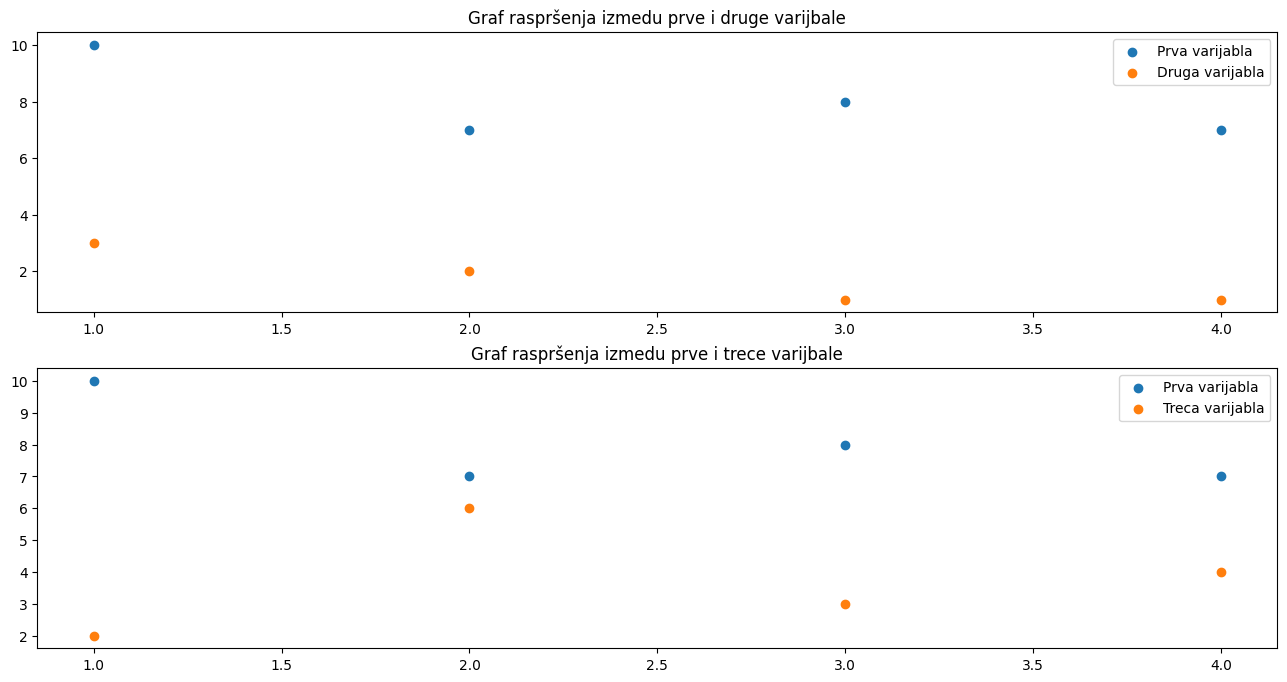

In [43]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 1, 1)
plt.scatter(range(1,5), X[0], label="Prva varijabla")
plt.scatter(range(1,5), X[1], label="Druga varijabla")
plt.title("Graf raspršenja izmedu prve i druge varijbale")
plt.legend(loc='best')

plt.subplot(2, 1, 2)
plt.scatter(range(1,5), X[0], label="Prva varijabla")
plt.scatter(range(1,5), X[2], label="Treca varijabla")
plt.title("Graf raspršenja izmedu prve i trece varijbale")
plt.legend(loc='best')

Grafovi potvrđuju podatke iz matrica kovarijacije i korelacije.

1 i 2 se u nekim točkama slično kreću pa zbog tog postoji kovarijacija i korelacija među njima.

1 i 3 su gotovo međusobno zrcaljeni a to se vidi i u tome da međusobno imaju veliku ali i negativnu kovarijaciju, a isto vrijedi i za korelaciju.

 Izračunajte statističku udaljenost:
 
 $$
 d\,(\mathbf{x}_1, \mathbf{x}_2) = ((\mathbf{x}_1 - \mathbf{x}_2)^\intercal \, \mathbf{S}^{-1} (\mathbf{x}_1 - \mathbf{x}_2)
 $$
  
 između prve i zadnje opservacije $d\,(\mathbf{x}_1, \mathbf{x}_4)$. Usporedite ju s euklidskom udaljenošću.

In [44]:
euklidska= np.linalg.norm(X.T[0] - X.T[3])

statisticka=(X.T[0] - X.T[3])@np.linalg.inv(S)@(X.T[0] - X.T[3]).T

print("Euklidska udaljenost je: "+ str(euklidska), end="\n\n")
print("Statisticka udaljenost je: \n"+ str(statisticka))

Euklidska udaljenost je: 4.123105625617661

Statisticka udaljenost je: 
6.000000000000021


#### (b) 
Neka $\mathbf{x}_i \in \mathbb{R}^{n \times 1}$ predstavlja vektor vrijednosti varijable $i$  (iz uzorka $\mathbf{X}$), a $\overline{x}_i$ predstavlja uzoračku srednju vrijednost varijable $i$. Za svaku varijablu $i$, izračunajte vektor devijacija (reziduala) $\mathbf{d}_i = \mathbf{x}_i - \overline{x}_i \mathbf{1}$. Usporedite duljinu vektora devijacija sa standardnom devijacijom varijable.

In [45]:
def deviation(Xi):
    return np.subtract(Xi.T, np.mean(Xi))

for i in range(0, len(X)):
    print("Standardna devijacajija varijable "+ str(i+1)+ " je: "+ str(np.std(X[i]))+", \nvektor devijacija je :\n"+str(deviation(X[i])))    

Standardna devijacajija varijable 1 je: 1.224744871391589, 
vektor devijacija je :
[ 2. -1.  0. -1.]
Standardna devijacajija varijable 2 je: 0.82915619758885, 
vektor devijacija je :
[ 1.25  0.25 -0.75 -0.75]
Standardna devijacajija varijable 3 je: 1.479019945774904, 
vektor devijacija je :
[-1.75  2.25 -0.75  0.25]


Generirajte $M = 1000$ realizacija slučajnog vektora dimenzije $4 \times 1$, gdje je svaka varijabla vektora iz diskretne uniformne razdiobe $\mathcal{U}\{0,10\}$. Za svaku varijablu izračunajte standardnu devijaciju i duljinu vektora devijacija. Na grafu prikažite standardnu devijaciju kao funkciju u ovisnosti o duljini vektora devijacija.

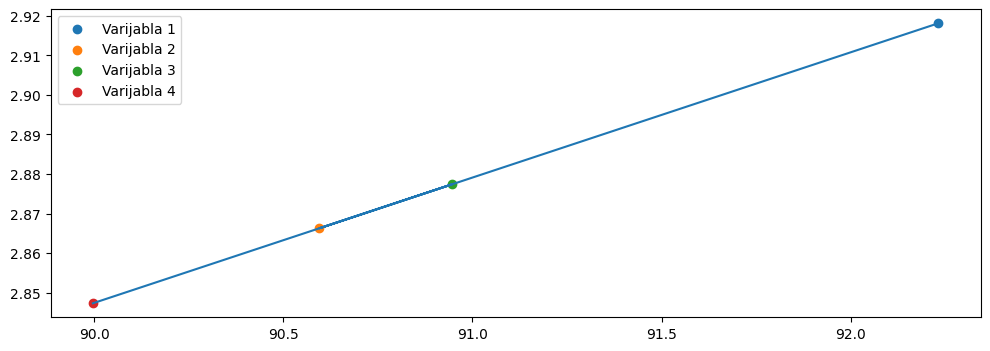

In [46]:
M=1000

uzorak= []

for i in range(1, M):
  vect=[]
  for j in range(0, 4):
    vect.append(np.random.uniform(0, 10))

  uzorak.append(vect)

uzorak=np.asarray(uzorak)
stds=[]
lenghts=[]
for i in range(0, 4):
  stds.append(np.std(uzorak.T[i]))
  lenghts.append(np.linalg.norm(deviation(uzorak.T[i])))


plt.figure(figsize=(12, 4))
for i in range(0, 4):
  plt.scatter(lenghts[i], stds[i], label='Varijabla '+str(i+1))

plt.plot(lenghts, stds)
plt.legend(loc='best')
plt.show()

Vidi se linearna ovisnost standardne devijacije o duljini vektora devijacija, to se vidi i iz formule da L_di^2=n*sii.

Duljina L_di je samo norma vektora.

#### (c) 
Preko izračunatih vektora devijacija $\mathbf{d}_i$ rekonstruirajte matricu kovarijance $\mathbf{S}$, a zatim i matricu korelacije $\mathbf{R}$. Dokažite da su rekonstruirane matrice jednake gore izračunatima.

s_ik=(di@dk)/N->tj udaljenost izmedu 2 vektora/n
r_ik=s_ik/(sqrt(s_ii)*sqrt(s_kk))

In [47]:
S=[]
R=[]
n=4
for i in range(0, n):

  row_S=[]
  row_R=[]

  for j in range(0, n):
      s_ij=(deviation(uzorak.T[i])@deviation(uzorak.T[j]).T)/M
      r_ij=s_ij/(np.sqrt((deviation(uzorak.T[i])@deviation(uzorak.T[i]).T)/M)*np.sqrt((deviation(uzorak.T[j])@deviation(uzorak.T[j]).T)/M))
      row_S.append(s_ij)
      row_R.append(r_ij)
  S.append(row_S)
  R.append(row_R)

S=np.asarray(S)
S_np=np.cov(uzorak.T)

R=np.asarray(R)
R_np=np.corrcoef(uzorak.T)

print("Matrica standarnde devijacije iz vektora devijacija je:\n"+ str(S), end='\n\n')
print("Matrica standarnde devijacije:\n"+ str(S_np), end='\n\n')

print("Matrica korelacije iz vektora devijacija je:\n"+ str(R), end='\n\n')
print("Matrica korelacijee:\n"+ str(R_np), end='\n\n')

Matrica standarnde devijacije iz vektora devijacija je:
[[ 8.50670188e+00 -1.22590204e-01  1.38973321e-01  1.06026968e-01]
 [-1.22590204e-01  8.20749413e+00 -1.25566207e-01  2.98068438e-03]
 [ 1.38973321e-01 -1.25566207e-01  8.27112830e+00  1.94194997e-01]
 [ 1.06026968e-01  2.98068438e-03  1.94194997e-01  8.09936148e+00]]

Matrica standarnde devijacije:
[[ 8.52374938e+00 -1.22835876e-01  1.39251825e-01  1.06239447e-01]
 [-1.22835876e-01  8.22394202e+00 -1.25817842e-01  2.98665769e-03]
 [ 1.39251825e-01 -1.25817842e-01  8.28770371e+00  1.94584165e-01]
 [ 1.06239447e-01  2.98665769e-03  1.94584165e-01  8.11559266e+00]]

Matrica korelacije iz vektora devijacija je:
[[ 1.00000000e+00 -1.46713430e-02  1.65679377e-02  1.27735127e-02]
 [-1.46713430e-02  1.00000000e+00 -1.52400048e-02  3.65582426e-04]
 [ 1.65679377e-02 -1.52400048e-02  1.00000000e+00  2.37263137e-02]
 [ 1.27735127e-02  3.65582426e-04  2.37263137e-02  1.00000000e+00]]

Matrica korelacijee:
[[ 1.00000000e+00 -1.46713430e-02  1.

#### (d) 
Izračunajte uzoračku generaliziranu varijancu $|\mathbf{S}|$ uzorka $\mathbf{X}$. Zatim dodajte novu varijablu koja je linearna kombinacija prve i druge varijable $\mathbf{x}_3 = \mathbf{x}_0 + \mathbf{x}_1$. Izračunajte uzoračku generaliziranu varijancu na novom uzorku.

In [51]:
gen_S=np.linalg.det(np.cov(X))

x3 = X[0]+X[1]
X_novi = np.vstack([X, x3])

gen_S_novi=np.linalg.det(np.cov(X_novi))

print("Uzoracka generalizirana varijanca nad X je "+ str(gen_S))
print("Uzoracka generalizirana varijanca nad X_novi je "+ str(gen_S_novi))


eigen_values_novi, eigen_vectors_novi=np.linalg.eig(X_novi)
print("Svojstveni vektori od X_novi su: \n"+ str(eigen_vectors_novi))

Uzoracka generalizirana varijanca nad X je 0.08333333333333307
Uzoracka generalizirana varijanca nad X_novi je -3.7007434154172e-17
Svojstveni vektori od X_novi su: 
[ 2.32674714e+01+0.j         -1.33735722e-01+1.79039073j
 -1.33735722e-01-1.79039073j -1.54629397e-15+0.j        ]


Maknite zadnju opservaciju iz originalnog uzorka $\mathbf{X}$. Izračunajte uzoračku generaliziranu varijancu i svojstvene vektore na novom uzorku. Što možete zaključiti iz ovog i prethodnog primjera?

In [56]:
X_novi_2=np.delete(X, 3, axis=1)
gen_S_novi_2=np.linalg.det(np.cov(X_novi_2))

eigen_values_novi_2, eigen_vectors_novi_2=np.linalg.eig(X_novi_2)

print("Uzoracka generalizirana varijanca nad X_novi_2 je "+ str(gen_S_novi_2))
print("Svojstveni vektori od X_novi_2 su: \n"+ str(eigen_vectors_novi_2))


Uzoracka generalizirana varijanca nad X_novi_2 je 0.0
Svojstveni vektori od X_novi_2 su: 
[[ 0.92392466+0.j         -0.38784023-0.35127578j -0.38784023+0.35127578j]
 [ 0.24706536+0.j         -0.20340534+0.37210337j -0.20340534-0.37210337j]
 [ 0.29209919+0.j          0.73915535+0.j          0.73915535-0.j        ]]


Uzoračka generalizirana varijanca |S| matrice koja ima linearno zavisne stupce je 0.

Za X_novi stupci 1 i 2 cine stupac 4.

### 2. Multivarijatna normalna razdioba

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe određene parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 6^2 \\
\end{bmatrix}
$$

In [12]:
X=[]

mi=np.asarray([2, 3])
sigma=[[100, 36], [36, 36]]

X=np.random.multivariate_normal(mi, sigma, size=1000)
print(X)    

[[-0.83293904  2.04802411]
 [19.63758903 17.87906156]
 [10.14479011  8.74367578]
 ...
 [-9.59239906 -4.26414111]
 [ 8.85655018 -5.16794556]
 [13.60190866  8.14520633]]


#### (a) 

Prikažite graf raspršenja dviju varijabli. Na istom grafu prikažite gustoću razdiobe uz pomoć elipsi za nekoliko različitih veličina $c^2$, gdje su točke $\mathbf{x}$ sve točke koje imaju jednaku udaljenost $c^2$ od središta $\mathbf{\mu}$:

$$
c^2 =(\mathbf{x} - \mathbf{\mu})^\intercal \mathbf{\Sigma}^{-1} (\mathbf{x} - \mathbf{\mu})
$$
Pripazite da osi grafa budu na istoj skali.

**Hint**: Pogledajte `contour` funkciju u R-u, ili `plt.contour` funkciju u Pythonu (`matplotlib` biblioteka)

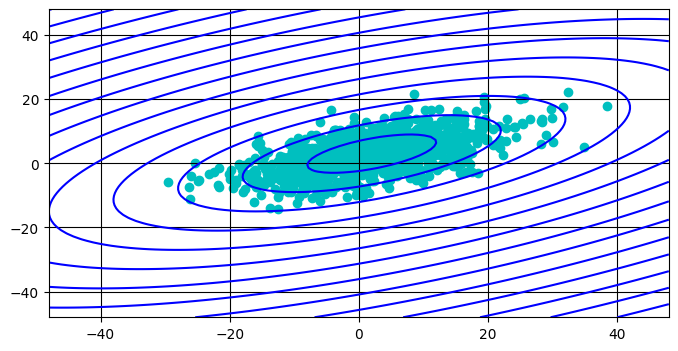

In [13]:
def crtaj(X, Y, mi, sigma):
    axis_limit = int(np.max([np.abs(X).max(), np.abs(Y).max()]) + 10)

    xs, ys = np.meshgrid(np.linspace(-axis_limit, axis_limit, 100), np.linspace(-axis_limit, axis_limit, 100))
    xys = np.vstack([xs.ravel(), ys.ravel()]).T
    c_2 = np.sum(np.dot((xys - mi), np.linalg.inv(sigma)) * (xys - mi), axis=1)
    levels = np.power(np.arange(1, 100), 2)
    plt.figure(figsize=(8, 4))
    plt.contour(xs, ys, c_2.reshape(xs.shape), levels=levels, colors='blue')
    plt.scatter(X, Y, c='c')
    plt.grid(c='k')
    plt.show()  

crtaj(X.T[0], X.T[1], mi, sigma)

#### (b)

Prikažite tri grafa raspršenja i pripadajućih elipsi uzorkovanjem iz multivarijatne normalne razdiobe s istim $\mu$ iz prošlog podzadatka i različitim matricama kovarijanci:

$$
\mathbf{\Sigma_1} = 
\begin{bmatrix}
10^2 & 6^2 \\
6^2 & 10^2 \\
\end{bmatrix},
\mathbf{\Sigma_2} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
\mathbf{\Sigma_3} = 
\begin{bmatrix}
10^2 & 8^2 \\
8^2 & 6^2 \\
\end{bmatrix}
$$
Ukoliko nije moguće prikazati grafove raspršenja, pokažite zašto.

<ipython-input-14-5436a398c329>:7: RuntimeWarning: covariance is not positive-semidefinite.
  X3=np.random.multivariate_normal(mi, sigma3, size=1000)


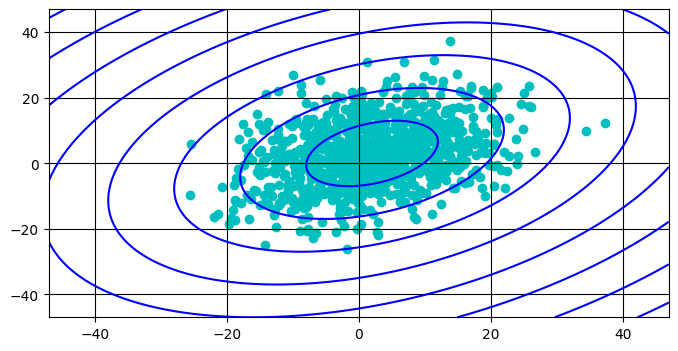

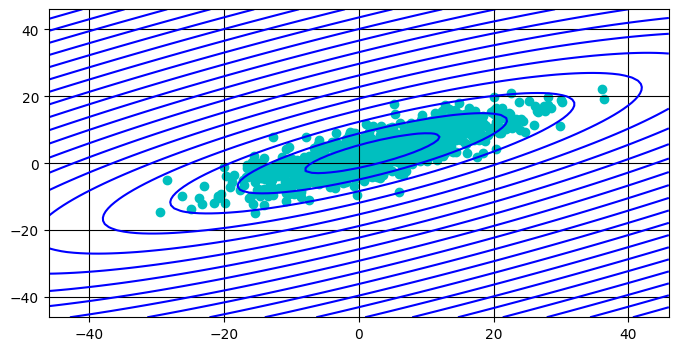

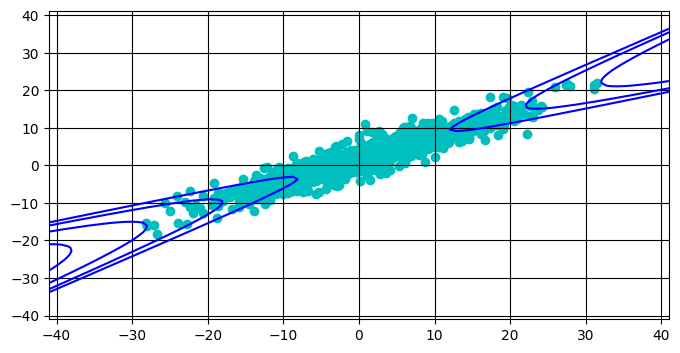

In [14]:
sigma1=np.asarray([[100, 36], [36, 100]])
sigma2=np.asarray([[100, 49], [49, 36]])
sigma3=np.asarray([[100, 64], [64, 36]])

X1=np.random.multivariate_normal(mi, sigma1, size=1000)
X2=np.random.multivariate_normal(mi, sigma2, size=1000)
X3=np.random.multivariate_normal(mi, sigma3, size=1000)


crtaj(X1.T[0], X1.T[1], mi, sigma1)  
crtaj(X2.T[0], X2.T[1], mi, sigma2)  
crtaj(X3.T[0], X3.T[1], mi, sigma3)  

Vidimo da treći graf nije dobar to je zato jer sigma_3 nije pozitivno defitna matrica.

In [ ]:
eigen_vals=np.linalg.eigvals(sigma3)
print(eigen_vals)
print("Vidi se da sve svojstvene vrijednosti nisu pozitivne pa sigma 3 nije pozitivno defitna")

[139.55417528  -3.55417528]
Vidi se da sve svojstvene vrijednosti nisu pozitivne pa sigma 3 nije pozitivno defitna


#### (c)

Promatramo $\mathbf{\Sigma}_1$ i $\mathbf{\Sigma}_2$ iz prošlog podzadatka. Neka su $\mathbf{X}_1 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_1)}$ i $\mathbf{X}_2 \sim \mathbf{\mathcal{N}}(\mathbf{\mu, \mathbf{\Sigma}_2)}$ slučajni dvo-dimenzionalni vektori, i neka je $\mathbf{X}_r$ slučajni vektor određen izrazom $\mathbf{X}_r = \mathbf{X}_1 - \mathbf{X}_2$. Odredite populacijske parametre koji određuju $\mathbf{X}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_r, \mathbf{\Sigma}_r)$.

In [15]:
#Xr=X1-X2
#mi_r=mi_1-mi_2
mi_r=mi-mi
print("Mean of Xr: "+str(mi_r))

sigma_r=sigma1+sigma2
print("Sigma of Xr: \n"+str(sigma_r))

Mean of Xr: [0 0]
Sigma of Xr: 
[[200  85]
 [ 85 136]]


Procjenite iste te parametre uzorkovanjem $n=10^7$ opservacija iz $\mathbf{X_1}$ i $\mathbf{X_2}$.

In [16]:
X1=np.random.multivariate_normal(mi, sigma1, size=10000000)
X2=np.random.multivariate_normal(mi, sigma2, size=10000000)


Xr=X1-X2
print("Procjena mi: "+str(np.mean(Xr, axis=0)))
print("Procjena sigma:\n "+str(np.cov(Xr, rowvar=False)))

Procjena mi: [-0.00371627  0.00126871]
Procjena sigma:
 [[200.0456915   85.02257746]
 [ 85.02257746 136.05722849]]


Procjenite parametre procjenitelja $\overline{\mathbf{X}}_r \sim \mathbf{\mathcal{N}}(\mathbf{\mu}_1, (1/n)\mathbf{\Sigma}_1)$ uzorkovanjem iz $\mathbf{X_1}$ i $\mathbf{X_2}$ na sljedeći način: generirajte $K = 10^5$ uzoraka, gdje svaki uzorak ima $n = 100$ opservacija.

In [17]:
def mean(X):
  sum=0
  for uzorak in X:
    sum+=np.mean(uzorak, axis=0)

  return sum/len(X) 


def sigma(X, mean):
  main_sum=0

  for uzorak in X:

    main_sum+=np.cov(uzorak, rowvar=False)

  return main_sum/len(X) 

X1=np.random.multivariate_normal(mi, sigma1, size=[100000, 100])
X2=np.random.multivariate_normal(mi, sigma2, size=[100000, 100])


Xr=X1-X2
print("Procjena mi: "+str(mean(Xr)))
print("Procjena sigma:\n "+str(sigma(Xr, mean(Xr))))

Procjena mi: [-0.00578835 -0.00725403]
Procjena sigma:
 [[199.98750008  85.0094272 ]
 [ 85.0094272  135.98561634]]


### 3. Statističko zaključivanje

Generirajte uzorak $\mathbf{X} \in \mathbb{R}^{1000x2}$ iz multivarijatne normalne razdiobe s parametrima:

$$
\mathbf{\mu} = [2, 3],
\mathbf{\Sigma} = 
\begin{bmatrix}
10^2 & 7^2 \\
7^2 & 6^2 \\
\end{bmatrix}
$$

In [18]:
mi=np.asarray([2,3])
sigma=np.asarray([[100,49], [49,36]])

X=np.random.multivariate_normal(mi, sigma, size=1000)
print(X)    

[[4.11200811 2.89186951]
 [3.74032529 4.41604983]
 [1.08840904 4.13074976]
 ...
 [8.30090479 3.3045027 ]
 [0.914925   2.94873187]
 [1.60024852 8.04358657]]


#### (a)

Implementirajte funkciju za određivanje *Hotellingove $T^2$* statistike.

T^2=n(X_mean-mi_0).T*(inv(S))*(X-mean-mi_0)>(n-1)*p/(n-p)*F(p, n-p, alfa)

In [19]:
def calculate_T_2(X, mi_0):
  mean=np.mean(X, axis=0)
  S=[[0,0],[0,0]]

  for x in X:
    diff=np.asarray([x-mean])
    S+=diff.T@diff

  S=S/(len(X)-1) 
  diff=np.asarray([mean-mi_0])
  T_2=len(X)*diff@(np.linalg.inv(S))@diff.T
  return T_2, S, mean 

Za generirani uzorak testirajte hiptezu $H_0: \mathbf{\mu}= [2, 3]$ naspram $H_1: \mathbf{\mu} \neq [2, 3]$ za razinu značajnosti $\alpha = 0.05$.

In [25]:
import scipy.stats

p=2
n=len(X)
alfa=0.05

T_2, S, mean_X=calculate_T_2(X, [2, 3])

critical_value=(((n-1)*p)/(n-p))*scipy.stats.f.ppf(1-alfa, p, n-p)

print("T^2="+str(T_2[0][0])+">"+str(critical_value)) 
print("Vidimo da gornji izraz nije istinit, stoga ne odbacujemo H0") 

T^2=2.20276240151847>6.015506913325887
Vidimo da gornji izraz nije istinit, stoga ne odbacujemo H0


#### (b)

Za generirani uzorak, prikažite na grafu $95\%$-tno područje pouzdanosti za $\mathbf{\mu}$ razdiobe.

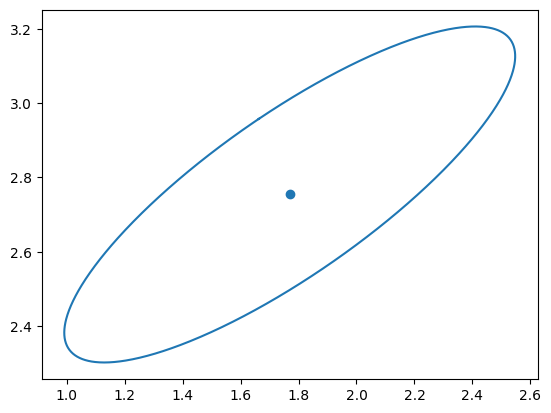

In [24]:
c_2=(((n-1)*p)/(n*(n-p)))*scipy.stats.f.ppf(1-alfa, p, n-p)
lambde, eigenvectors=np.linalg.eig(S)

theta = np.linspace(0, 2*np.pi, n);
elipsa = (np.sqrt(lambde)*np.sqrt(c_2) * eigenvectors) @ [np.sin(theta), np.cos(theta)]
plt.plot(elipsa[0,:]+mean_X[0], elipsa[1,:]+mean_X[1])
plt.scatter(mean_X[0],mean_X[1])

Podrucje pozitivnosti je definirano eigen vrjednostima i vektorima. Vekoti za smjer a pomocu vrijednosti se dobivaju duljeine osi.

+-sqrt(lambda_i)*sqrt((n-1)*p/((n-p)*n)*F(p, n-p, alfa))*e_i

#### (c)

Uz pomoć simultanih intervala pouzdanosti ($T^2$-interval), odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli, $\mu_1$ i $\mu_2$, te njihovu razliku $\mu_2 - \mu_1$.

Za mi_i:

X_mean_i+-sqrt((n-1)*p/(n-p)*F(p, n-p, alfa))*sqrt(s_ii/n)


Za mi_i-mi_j:

X_mean_i-X_mean_k+-sqrt((n-1)*p/(n-p)*F(p, n-p, alfa))*sqrt((s_ii-2s_ik+s_kk)/n)

In [26]:
def std_ii(X, mean):
  sum=0
  for x in X:
    sum+=(x-mean)**2
  return sum/len(X)

def std_ik(X, mean_i, mean_k):
  sum=0
  for x in X:
    sum+=(x[0]-mean_i)*((x[1]-mean_k))
  return sum/len(X)

mean_x1=np.mean(X.T[0])
mean_x2=np.mean(X.T[1])

std_x1=std_ii(X.T[0], mean_x1)
std_x2=std_ii(X.T[1], mean_x2)

std_r=std_ik(X, mean_x1, mean_x2)

critical_value=(((n-1)*p)/(n-p))*scipy.stats.f.ppf(alfa, p, n-p)


print("95%-tni T^2-interval pouzdanosti za mi_1 je: ["+str(mean_x1-np.sqrt(critical_value)*np.sqrt(std_x1/n))+", "+str(mean_x1+np.sqrt(critical_value)*np.sqrt(std_x1/n))+"]")
print("95%-tni T^2-interval pouzdanosti za mi_2 je: ["+str(mean_x2-np.sqrt(critical_value)*np.sqrt(std_x2/n))+", "+str(mean_x2+np.sqrt(critical_value)*np.sqrt(std_x2/n))+"]")
print("95%-tni T^2-interval pouzdanosti za mi_2-mi_1 je: ["+str(mean_x2-mean_x1-np.sqrt(critical_value)*np.sqrt((std_x2-2*std_r+std_x1)/n))+", "+str(mean_x2-mean_x1+np.sqrt(critical_value)*np.sqrt((std_x2-2*std_r+std_x1)/n))+"]")

95%-tni T^2-interval pouzdanosti za mi_1 je: [1.6681316895761857, 1.8712732083404995]
95%-tni T^2-interval pouzdanosti za mi_2 je: [2.695186043641596, 2.813286075344094]
95%-tni T^2-interval pouzdanosti za mi_2-mi_1 je: [0.9218225898880198, 1.047244631180985]


Izračunajte univarijatni $t$-interval pouzdanosti za srednju vrijednost svake varijable, a zatim i Bonferronijevu korekciju $t$-intervala. Usporedite s rezultatima dobivenim pomoću $T^2$-intervala.

t^2 interval:
mean_x+-t(alfa/2,n-1)*(sqrt(s_ii/n))

Bonderronijev interval:
mean_x+-t(alfa/2*p,n-1)*(sqrt(s_ii/n))

In [28]:
def t_int(alfa, X):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  
  a=mean_x+scipy.stats.t.ppf(alfa/2,len(X)-1)*(np.sqrt(s/len(X)))
  b=mean_x-scipy.stats.t.ppf(alfa/2,len(X)-1)*(np.sqrt(s/len(X)))
  return a, b

def bonf_int(alfa, X, p):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  
  a=mean_x+scipy.stats.t.ppf(alfa/(2*p),len(X)-1)*(np.sqrt(s/len(X)))
  b=mean_x-scipy.stats.t.ppf(alfa/(2*p),len(X)-1)*(np.sqrt(s/len(X)))
  return a, b

a_1_t,b_1_t=t_int(0.05, X.T[0])
a_2_t,b_2_t=t_int(0.05, X.T[1])

print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_t)+", "+str(b_1_t)+"]")
print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_t)+", "+str(b_2_t)+"]")

a_1_b,b_1_b=bonf_int(0.05, X.T[0],2)
a_2_b,b_2_b=bonf_int(0.05, X.T[1], 2)

print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_b)+", "+str(b_1_b)+"]")
print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_b)+", "+str(b_2_b)+"]")

95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: [1.147732573113018, 2.3916723248036673]
95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: [2.3926425137610456, 3.1158296052246444]
95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 1 je: [1.058210789294828, 2.481194108621857]
95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 2 je: [2.340597389892209, 3.167874729093481]


Izračunajte $\tilde{\chi}^2$ interval pouzdanosti za velike uzorke za srednju vrijednost svake varijable. Usporedite dobivenu vrijednost s prethodno dobivenim vrijednostima.

hi^2 interval:
X_mean_i+-sqrt(hi(alfa, p)*sqrt(s_ii/n)

In [29]:
def hi_2_int(alfa, X, p):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  a=mean_x-np.sqrt(scipy.stats.chi2.ppf(alfa,p))*(np.sqrt(s/len(X)))
  b=mean_x+np.sqrt(scipy.stats.chi2.ppf(alfa,p))*(np.sqrt(s/len(X)))
  return a, b


a_1_hi,b_1_hi=hi_2_int(0.05, X.T[0], 2)
a_2_hi,b_2_hi=hi_2_int(0.05, X.T[1], 2)

print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_hi)+", "+str(b_1_hi)+"]")
print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_hi)+", "+str(b_2_hi)+"]")

95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: [1.6681851473721108, 1.8712197505445745]
95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: [2.695217122307503, 2.813254996678187]


U idućem zadatku ćete provesti ostatak naučenih metoda vezano uz statističko zaključivanje o više vektora sredine.

### 4. Primjena implementiranih metoda

Učitajte podatkovni skup [*iris*](https://archive.ics.uci.edu/ml/datasets/Iris) (postoji mogućnost i učitavanja unutar jezika - [Python](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html) / [R](https://technicaljockey.com/r-programming-training/loading-iris-data-set-in-r/)).

In [58]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Procijenite parametre $\mathbf{\mu},\mathbf{\Sigma}$ vezane uz 4 numeričke varijable.

In [31]:
print("Mi je: "+str(np.mean(X, axis=0))+",\n a sigma:\n"+str(np.cov(X, rowvar=False)))

Mi je: [5.84333333 3.05733333 3.758      1.19933333],
 a sigma:
[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


Provedite analizu normalnosti 4 numeričkih varijabli. Ukoliko je potrebno, predložite koje transformacije biste radili na podatcima kako biste ojačali pretpostavke normalnosti u skupu. 

Text(0.5, 1.0, 'Distribucija varijble 4')

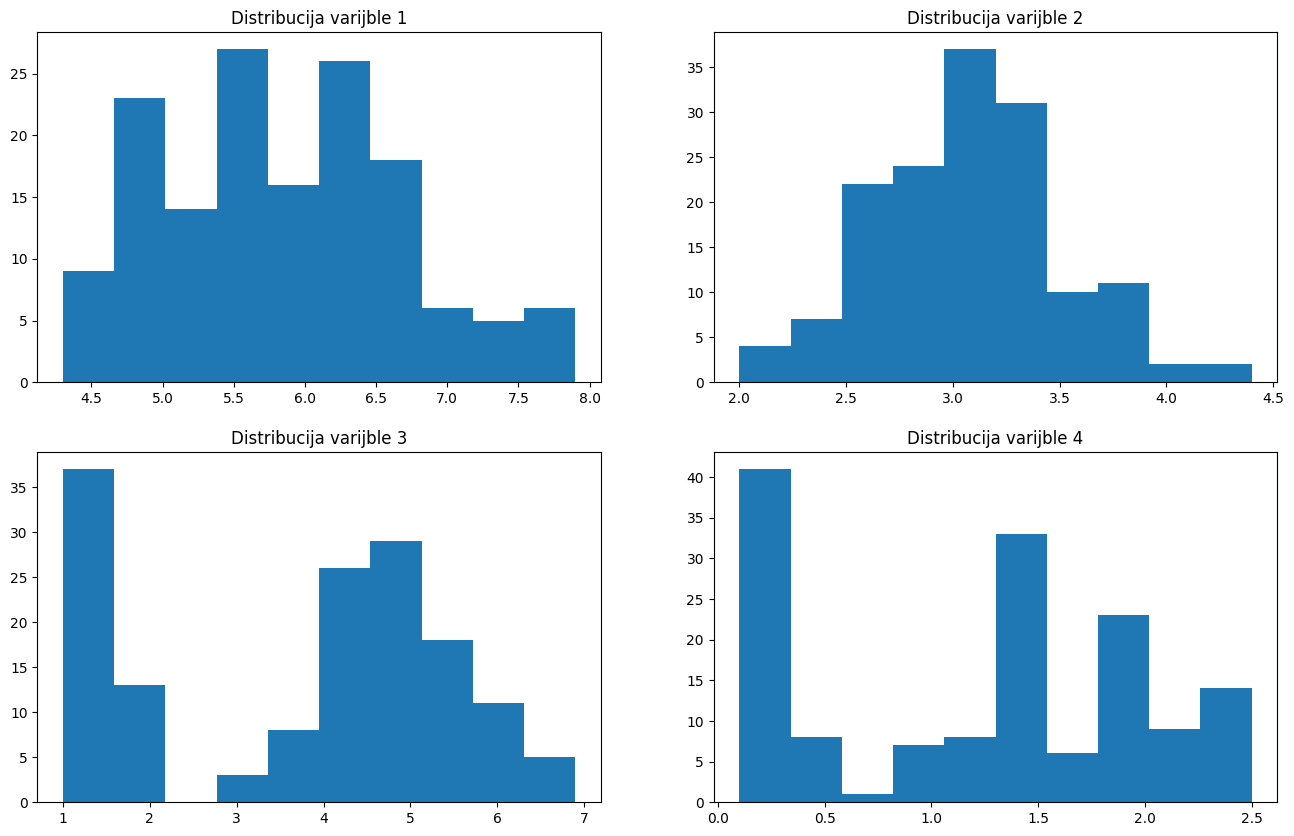

In [59]:
plt.figure(figsize=(16, 10))
plt.subplot(2,2,1)
plt.hist(X[:,0])
plt.title("Distribucija varijble 1")

plt.subplot(2,2,2)
plt.hist(X[:,1])
plt.title("Distribucija varijble 2")

plt.subplot(2,2,3)
plt.hist(X[:,2])
plt.title("Distribucija varijble 3")

plt.subplot(2,2,4)
plt.hist(X[:,3])
plt.title("Distribucija varijble 4")

Histrogram ukazuje na to da varijable(1, 3, 4) vjerojatno ne prate normalnu razdiobu, a da varijabla 2 prati, ali vjerojatno bi trebali analizirati više podataka da bismo bili sigurni. Ako želimo da podatci budu normalni trebamo na njih primjeniti neku od transformacija poput Fischerove.

Provedite detekciju stršećih vrijednosti (vizualno/numerički).

**Hint**: Poglavlje 4.7 (Johnson)

Gledanjem gornjih grafova mogli bi reći da postoje neki outlieri, ali sad ćemo to potvrditi.

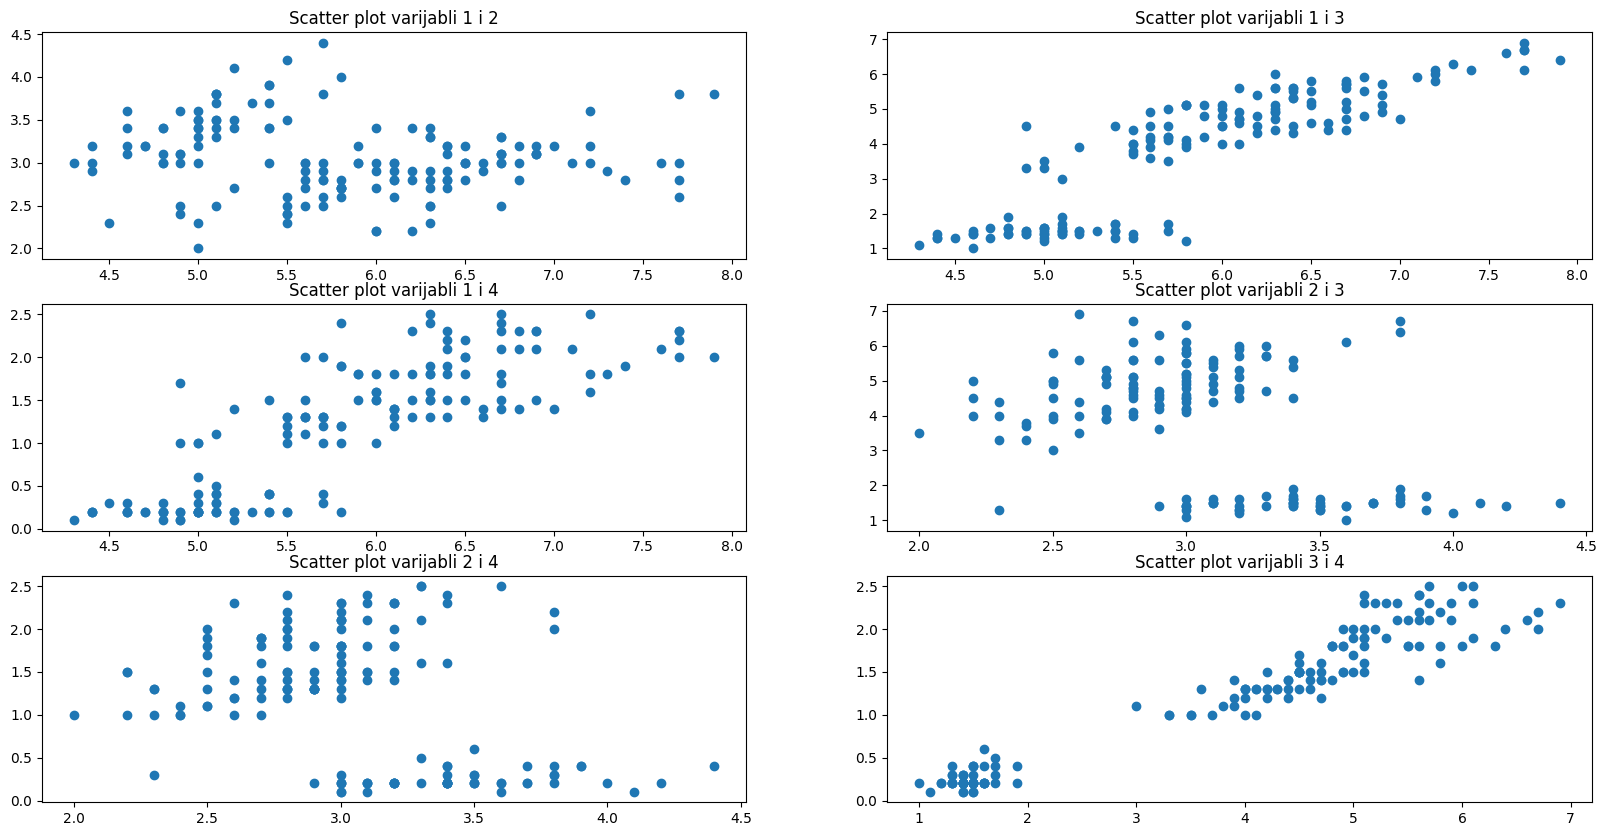

In [32]:
import itertools

i=1
plt.figure(figsize=(20, 10))
for pair in itertools.combinations(range(0, 4), 2):
  plt.subplot(3,2,i)
  i+=1
  plt.scatter(X[:,pair[0]], X[:, pair[1]])
  plt.title("Scatter plot varijabli "+str(pair[0]+1)+" i "+ str(pair[1]+1))

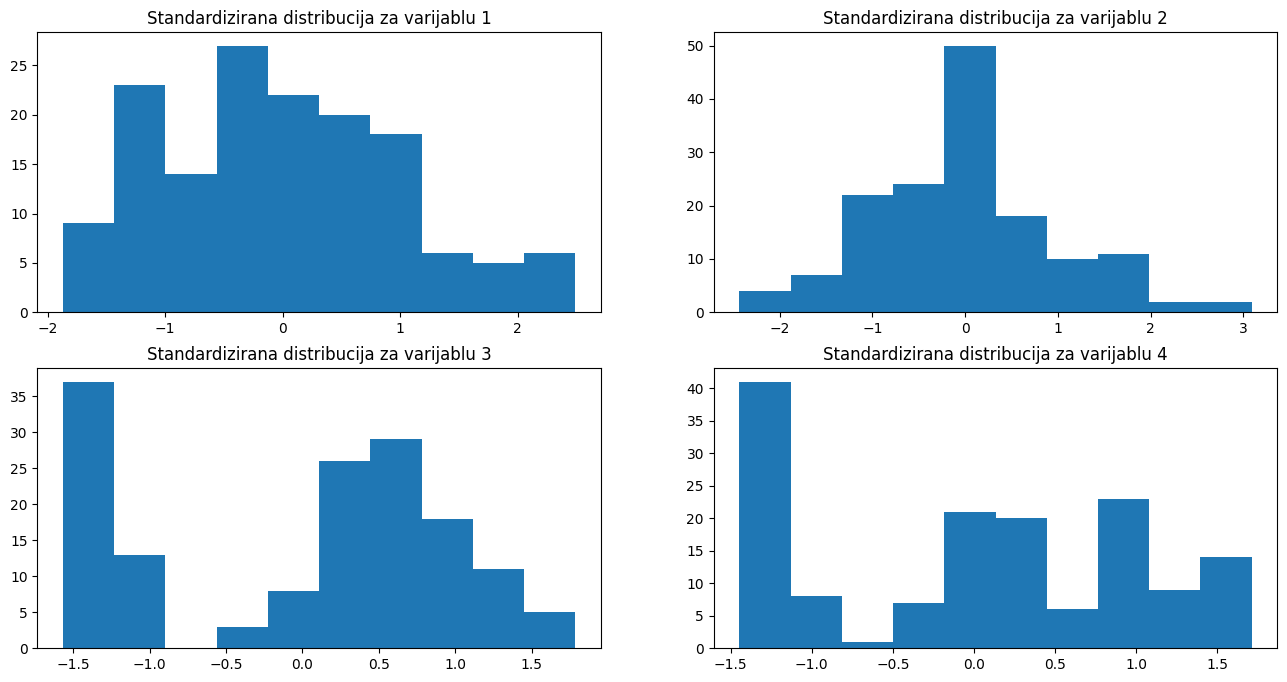

In [34]:
#3. korat standardno skaliranje
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(16, 8))
for i in range(0, 4):
  plt.subplot(2,2, i+1)
  scaler= StandardScaler().fit(X[:,i].reshape(-1,1))
  standardizirano=scaler.transform(X[:,i].reshape(-1,1))
  plt.hist(standardizirano)
  plt.title("Standardizirana distribucija za varijablu "+str(i+1))

Skalirani histogrami pokazuju da postoje outlieri i da sve znacajke ipak nisu normalne.

In [36]:
def hi_2_distance(X):
  mean_x=np.mean(X, axis=0)
  S=np.cov(X, rowvar=False)

  hi_2=[]

  for x in X:
      diff=np.asarray([x-mean_x])
      hi_2.append((diff@np.linalg.inv(S)@diff.T)[0][0])
  return np.asarray(hi_2)


print("Hi^2 udaljenosti:")
print(hi_2_distance(X))      

Hi^2 udaljenosti:
[ 2.13446792  2.84911869  2.08133866  2.45238163  2.46215453  3.88341767
  2.86210813  1.83330032  3.38407311  2.37521789  3.28310687  2.77479751
  2.61329752  3.60343235  8.73751836  9.71278989  5.76058768  2.32138944
  4.49968993  3.43886583  2.63600714  2.92924957  3.61341142  2.23717307
  5.30236074  2.44531027  1.76582862  2.19718064  2.5027712   2.46439801
  1.98496377  4.591138    8.35834134  7.22131394  1.98206792  3.41730308
  5.33721746  3.45133496  3.1549793   1.89261965  2.54850128 11.42402878
  3.31446967  3.70858554  4.48405602  2.97866021  4.4333077   2.35943089
  3.00769697  1.92856413  4.45283107  0.62739964  3.01862804  3.61252784
  2.04045901  3.31958582  1.27634408  4.30933052  2.74265784  3.16652293
  7.68329301  0.43231762  7.56140235  1.548287    1.03725478  2.78656307
  3.47327159  3.32897963  7.39237788  2.1837666   3.26150333  1.36011003
  2.38852941  4.50733075  1.60951928  2.33626116  4.19829051  1.42196642
  0.31947295  2.11122234  2.81477

Neki unosi imaju podosta veću hi-kvadrat udaljenost što potvrđuje da su oni outlieri.

Odredite $95\%$-tno područje pouzdanosti za srednje vrijednosti varijabli.

**Hint**: Prethodno implementirani $T^2$-interval/ $t$-interval/ Bonferroni

In [38]:
def std_ii(X, mean):
  sum=0
  for x in X:
    sum+=(x-mean)**2
  return sum/len(X)

def hi_2_int(alfa, X, p):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  
  a=mean_x-np.sqrt(scipy.stats.chi2.ppf(alfa,p))*(np.sqrt(s/len(X)))
  b=mean_x+np.sqrt(scipy.stats.chi2.ppf(alfa,p))*(np.sqrt(s/len(X)))
  return a, b

def t_int(alfa, X):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  
  a=mean_x+scipy.stats.t.ppf(alfa/2,len(X)-1)*(np.sqrt(s/len(X)))
  b=mean_x-scipy.stats.t.ppf(alfa/2,len(X)-1)*(np.sqrt(s/len(X)))
  return a, b

def bonf_int(alfa, X, p):
  mean_x=np.mean(X)
  s=std_ii(X, mean_x)
  
  a=mean_x+scipy.stats.t.ppf(alfa/(2*p),len(X)-1)*(np.sqrt(s/len(X)))
  b=mean_x-scipy.stats.t.ppf(alfa/(2*p),len(X)-1)*(np.sqrt(s/len(X)))
  return a, b

a_1_t,b_1_t=t_int(0.05, X.T[0])
a_2_t,b_2_t=t_int(0.05, X.T[1])
a_3_t,b_3_t=t_int(0.05, X.T[2])
a_4_t,b_4_t=t_int(0.05, X.T[3])

print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_t)+", "+str(b_1_t)+"]")
print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_t)+", "+str(b_2_t)+"]")
print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 3 je: ["+str(a_3_t)+", "+str(b_3_t)+"]")
print("95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 4 je: ["+str(a_4_t)+", "+str(b_4_t)+"]")
print()

a_1_b,b_1_b=bonf_int(0.05, X.T[0],2)
a_2_b,b_2_b=bonf_int(0.05, X.T[1], 2)
a_3_b,b_3_b=bonf_int(0.05, X.T[2],2)
a_4_b,b_4_b=bonf_int(0.05, X.T[3], 2)

print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_b)+", "+str(b_1_b)+"]")
print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_b)+", "+str(b_2_b)+"]")
print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 3 je: ["+str(a_3_b)+", "+str(b_3_b)+"]")
print("95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 4 je: ["+str(a_4_b)+", "+str(b_4_b)+"]")
print()

a_1_hi,b_1_hi=hi_2_int(0.05, X.T[0], 2)
a_2_hi,b_2_hi=hi_2_int(0.05, X.T[1], 2)
a_3_hi,b_3_hi=hi_2_int(0.05, X.T[2], 2)
a_4_hi,b_4_hi=hi_2_int(0.05, X.T[3], 2)

print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: ["+str(a_1_hi)+", "+str(b_1_hi)+"]")
print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: ["+str(a_2_hi)+", "+str(b_2_hi)+"]")
print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 3 je: ["+str(a_3_hi)+", "+str(b_3_hi)+"]")
print("95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 4 je: ["+str(a_4_hi)+", "+str(b_4_hi)+"]")

95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 1 je: [5.710178562391521, 5.9764881042751465]
95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 2 je: [2.98724512012054, 3.1274215465461275]
95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 3 je: [3.4741363398987692, 4.041863660101232]
95%-tni t^2-interval pouzdanosti za srednju vrijednost varijablu 4 je: [1.0767639167319225, 1.3219027499347447]

95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 1 je: [5.690753601328503, 5.995913065338164]
95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 2 je: [2.977020470992272, 3.1376461956743955]
95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 3 je: [3.432725577778337, 4.083274422221664]
95%-tni Bonferronijev-interval pouzdanosti za srednju vrijednost varijablu 4 je: [1.0588831744336267, 1.3397834922330405]

95%-tni hi^2-interval pouzdanosti za srednju vrijednost varijablu 1 je:

Razmatramo *species: virginica* populaciju. Razlikuju li se  *sepal* __length__ i __width__ varijable od *petal* __length__ i __width__ varijabli (duljina i širina sepala i papučica - dijelovi reproduktivnog sustava cvijeta)?

**Hint**: Metoda uparenih usporedbi

In [39]:
#Sepal Length, Sepal Width, Petal Length and Petal Width.
#Setosa, Versicolour, and Virginica


y_virginica=iris.target==2
X_virginica=iris.data[y_virginica]

def get_D_vect(X):
  D=[]
  for x in X:
    D.append([x[0]-x[2], x[1]-x[3]])

  return np.asarray(D)

D=get_D_vect(X_virginica)


n=len(X_virginica)
#p=2 jer se gleda razlika izmedu 2 varijable
p=2
alfa=0.05

D_mean=np.mean(D, axis=0)
S_d=np.cov(D, rowvar=False)

T_2=n*D_mean.T@(np.linalg.inv(S_d))@D_mean

critical_value=(((n-1)*p)/(n-p))*scipy.stats.f.ppf(1-alfa, p, n-p)

print("T^2="+str(T_2)+">"+str(critical_value)) 
print("Vidimo da gornji izraz istinit, stoga odbacujemo H0: delta=0") 

T^2=854.5450645298906>6.514401644187351
Vidimo da gornji izraz istinit, stoga odbacujemo H0: delta=0


Usporedite vektore srednjih vrijednosti za sve varijable između svih *species* populacija. Postoji li statistički značajna razlika?

**Hint**: MANOVA

In [40]:
from statsmodels.multivariate.manova import MANOVA

iris = datasets.load_iris()
X = iris.data
y = iris.target

manova = MANOVA(endog=X, exog=y)
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
           x0            Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0280 4.0000 146.0000 1266.9972 0.0000
         Pillai's trace  0.9720 4.0000 146.0000 1266.9972 0.0000
 Hotelling-Lawley trace 34.7123 4.0000 146.0000 1266.9972 0.0000
    Roy's greatest root 34.7123 4.0000 146.0000 1266.9972 0.0000



Wilks' lambda govori o proporciji varijabilnosti izmedju grupa i sto je blize 1 to znaci da su sredine slicne. Pr > F daje nam p_vrijednost o tome da su sredine iste.